In [2]:
%pylab inline
import numpy as np
import matplotlib
from matplotlib.pylab import plot, legend, csv2rec

Populating the interactive namespace from numpy and matplotlib


In [5]:
trends = csv2rec('trends.csv')

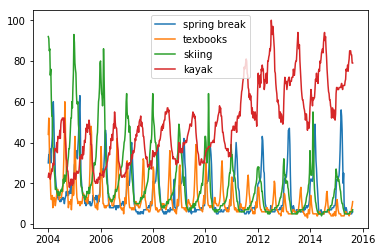

In [6]:
plot(trends.week_start, trends.spring_break, label='spring break') 
plot(trends.week_start, trends.textbooks, label='texbooks') 
plot(trends.week_start, trends.skiing, label='skiing') 
plot(trends.week_start, trends.kayak, label='kayak') 
legend()

show the trends.csv

In [3]:
import pandas as pd
df = pd.read_csv('trends.csv',index_col=0, parse_dates=True)
df

,week_end,textbooks,spring_break,kayak,skiing,global_warming
week_start,,,,,,
2004-01-04,2004-01-10,44,30,23,92,14
2004-01-11,2004-01-17,52,34,25,91,21
2004-01-18,2004-01-24,39,34,24,85,19
2004-01-25,2004-01-31,29,37,24,86,18
2004-02-01,2004-02-07,22,34,22,73,20
2004-02-08,2004-02-14,14,30,24,76,20
2004-02-15,2004-02-21,12,36,25,62,15
2004-02-22,2004-02-28,13,39,27,53,27
2004-02-29,2004-03-06,14,43,26,53,21


week_end          2004-01-10
textbooks                 44
spring_break              30
kayak                     23
skiing                    92
global_warming            14
Name: 2004-01-04 00:00:00, dtype: object


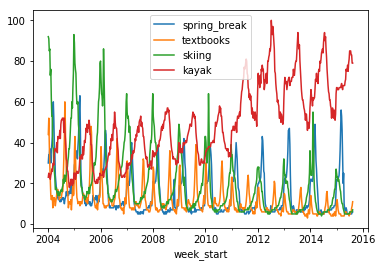

In [6]:
print (df.iloc[0])
df.spring_break.plot()
df.textbooks.plot()
df.skiing.plot()
df.kayak.plot()
legend()

### Find the maxima and minimum 

Creata vector of year and week numbers

In [8]:
dates = trends.week_start
years = zeros_like(dates)
weeks = zeros_like(dates)

for i in range(len(dates)):
    years[i] = dates[i].year
    weeks[i] = dates[i].isocalendar()[1]

In [11]:
trend = trends.global_warming
for year in range(2004, 2011):
    idx = find(years == year)
    print(year, weeks[find(trend[idx] == max(trend[idx]))], weeks[find(trend[idx]==min(trend[idx]))])

2004 [46] [28 30 31 32 33]
2005 [38 48 49] [52]
2006 [49 53] [33]
2007 [10] [51]
2008 [16] [51]
2009 [49] [32 33]
2010 [1] [51]


In [12]:
def std_median(datums):
    return sqrt( sum( (datums - median(datums))**2 ) )

In [14]:
print (std_median(trends.spring_break))
print (std_median(trends.textbooks)) 
print (std_median(trends.skiing))
print (std_median(trends.kayak))
print (std_median(trends.global_warming))

310.621956726
205.684223994
449.831079406
462.606744439
305.695927353


[-6.5]


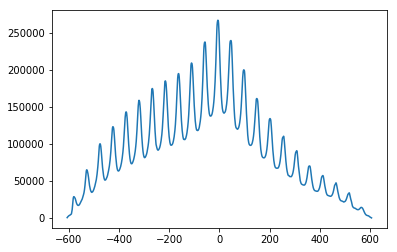

In [15]:
result = np.correlate(trends.skiing,trends.spring_break, mode='full')
gap=arange(result.size)- result.size/2
plot(gap, result)
print(gap[find(result==max(result))])

In [ ]:
result = np.correlate(trends.skiing,trends.global_warming, mode='full') gap = arange(result.size) - result.size/2 plot(gap,result) 
print (gap[find(result==max(result))])

[-61.5]


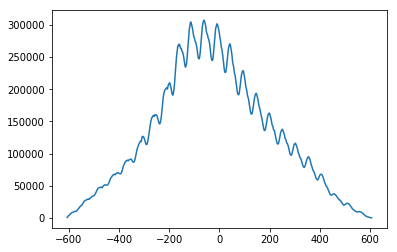

In [16]:
result = np.correlate(trends.skiing,trends.global_warming, mode='full') 
gap = arange(result.size) - result.size/2 
plot(gap,result) 
print (gap[find(result==max(result))])